## Parameter estimation by optimization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
nohitter_times  = [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]

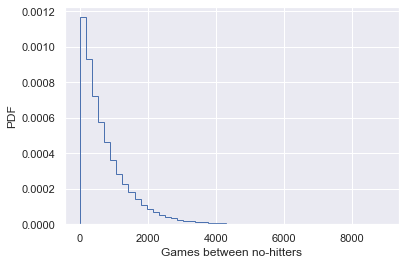

In [3]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(np.array(nohitter_times))

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


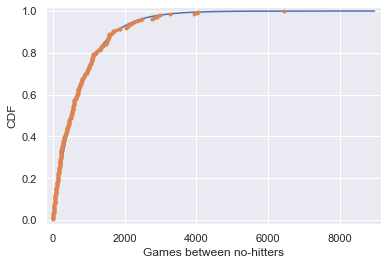

In [5]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


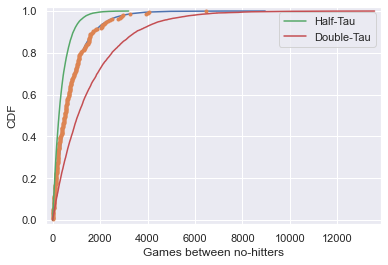

In [6]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, label = 'Half-Tau')
_ = plt.plot(x_double, y_double,label = 'Double-Tau')
plt.legend()
# Show the plot
plt.show()

In [7]:
import pandas as pd

In [8]:
fertility_data = pd.read_csv("stats2/female_literacy_fertility.csv")

In [9]:
fertility_data.tail()

,Country,Continent,female literacy,fertility,population
157,Vanuatu,OCE,79.5,3.883,"233,866"
158,Samoa,OCE,98.5,3.852,"178,869"
159,Sao Tomé-et-Principe,AF,83.3,3.718,"160,174"
160,Aruba,LAT,98.0,1.732,"105,455"
161,Tonga,ASI,99.1,3.928,"103,566"


In [10]:
fertility = fertility_data['fertility'].values

In [11]:
# the illeteracy rate amongst women in different countries
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [12]:
from scipy.stats.stats import pearsonr

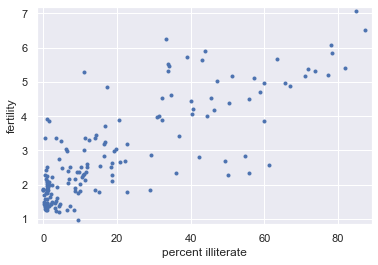

(0.8041324026815345, 5.635092985976583e-38)


In [13]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearsonr(illiteracy, fertility))


slope = 0.04979854809063426 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


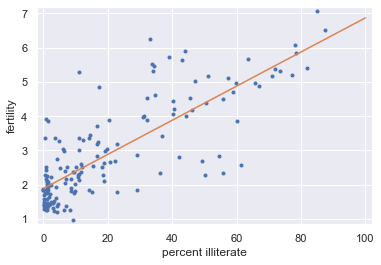

In [14]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


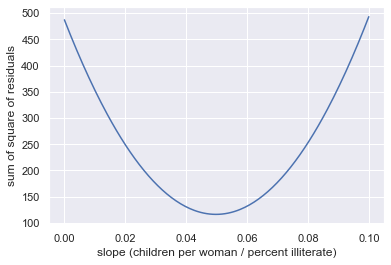

In [15]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


In [16]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

0.5000909090909095 3.000090909090909


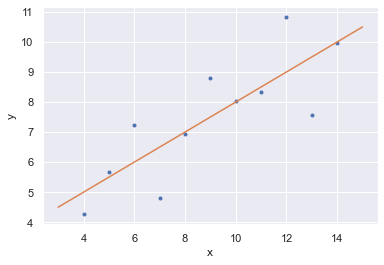

In [17]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y, marker='.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [18]:
anscombe_x =np.array([[10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],[10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],
                    [10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.],[ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.]])

In [19]:
anscombe_y = np.array([[ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84, 4.82,  5.68], [9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74],
                     [ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73],
                    [ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,7.91,  6.89]])

In [20]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735


# Bootstrap confidence intervals


In [21]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

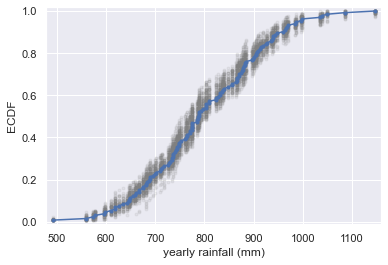

In [22]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y,marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [23]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [24]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


#### Bootstrap replicates of the mean and the SEM


10.510549150506188
10.358764199574097


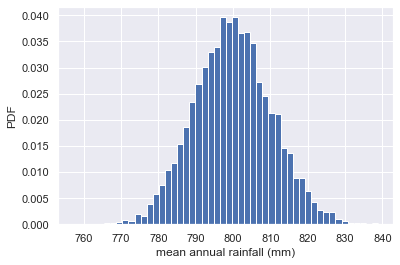

In [25]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [26]:
# Finding the 95% confidence interval
np.percentile(bs_replicates,[2.5,97.5])


array([779.96900376, 820.62793233])

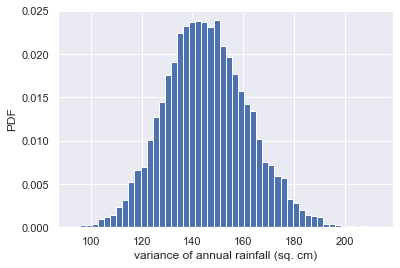

In [27]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


95% confidence interval = [663.65229084 869.79741036] games


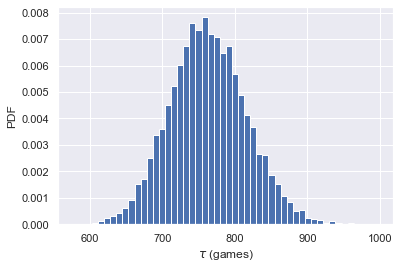

In [28]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### A function to do pairs bootstrap


In [29]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.array(np.random.choice(inds, size=len(inds)))
        print("bs_inds")
        print(bs_inds)
        print(x)
        print(type(bs_inds))
        print(type(x))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps


bs_inds
[ 72 156 125  88 119 153   4  18   9  22  29  95 108  26  47  85 124  62
  96 129  41  37   5  59 138  59 160  80 119 132  28 127  80 158   1  92
  59 143  96 114  43 158  48 119 102  31  62 133 147  90  32  49  60 159
 126  21   3 113  60  33  87  97  16 119  23   0  26  85 108  52 143  86
 106 109  15  44   2  79  99  79 122 160 140 147  10  74  67  44  52  15
  35 131  58 122 147  21  15 120  18 125   2  38 148  23  10 119 111 151
  10  71 140  56 133 150  72  27  31 100  36  52  18  11   1 107 124   7
  52 154  23 136 100  26  46 114 123  70 142  24 143 118 104 116 143 131
   7  70  31  45 139  35  11 124  71  82  31 120  21  46  45  61  29  60]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

bs_inds
[119  11  35 137 144  56 160  95  84   9  45  59  27 102  70   2 137  99
  23 131  12 123  21 120 113   8 117  36  28  33   2  11 152  34  75 111
   7  55   3  30  55  58  56  43  84 155  65  52  31  61  44 104  24  13
 114   6 108 153  17  16  35  38 138  37 123  89 112  78  92 116 102  53
  26  90  32  68 150 115  19  81 143 101  68  56 156 145  77  30 160 121
  90 134  69  33 132 115 145  32  34  64   7 121 161 134  47  81 106  38
 152 105  76 136  47  59 152 130  70  29  17 148  99  10 118  29 128  90
 119 123  97   8  20  50 159  57  43  81  34  84  60  19 160  26 118 145
 104 139  47  98 138  29 120 104  69  28 142  35  52  65 117  69 134  85]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

  73  16  89 122  76  48 132  76 106 109 114  11 148  84 127 112  76  41]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 81.8 39.  11.2 67.
  4.1  0.2 78.1  1.   7.1  1.  29.   1.1 11.7 73.6 33.9 14.   0.3  1.
  0.8 71.9 40.1  1.   2.1  3.8 16.5  4.1  0.5 44.4 46.3 18.7  6.5 36.8
 18.6 11.1 22.1 71.1  1.   0.   0.9  0.7 45.5  8.4  0.   3.8  8.5  2.
  1.  58.9  0.3  1.  14.  47.   4.1  2.2  7.2  0.3  1.5 50.5  1.3  0.6
 19.1  6.9  9.2  2.2  0.2 12.3  4.9  4.6  0.3 16.5 65.7 63.5 16.8  0.2
  1.8  9.6 15.2 14.4  3.3 10.6 61.3 10.9 32.2  9.3 11.6 20.7  6.5  6.7
  3.5  1.   1.6 20.5  1.5 16.7  2.   0.9]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
bs_inds
[ 47 143  24  30 152 151  69   3  50  21   8  16  3

  3.5  1.   1.6 20.5  1.5 16.7  2.   0.9]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
bs_inds
[ 24   7 151  63 105 144   5 150   4 150  18  66  61 100 135  91 153  86
 113 136 108 142 109  29 116 138 111 115  35 161  28 139  40   2  28   5
 135 114  62 130  22 140 114  94  94  37 134 122 128  70  87 108  54  79
  26 149 161   9  55   0  72  80  46  12  68 150  72  28   5  96 134  85
  39  15 144 156 148  49 119 121  64  59  29  10  42 153  79 103 126 134
  93 148  71 133 145  46 121  87 105  13  51 108  48  48 118 115  63  78
  56  81 112  75 113 104 138  63  20 137  88  10  25  90   2   6  97  80
  41  51 152  41  60  19  18  43 121 119  58 119   8 117 145  62 128  94
 131 102 159  53 144 117 131  21  61  47  74   4  29  12  95 112 138  47]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 5

bs_inds
[ 82  11 145 137 104 153  39 116 142  90  99  21  36  46  92  24 119   5
   4 142  51  35 104 132   4  32  56 145 160   7  17 111 137  35  94 126
 161  96  92 138  35  57  53 148 121  25  24 111 149 119 143  91  92 100
 130 138 152  36 151 135 136 161  75  57  40  14 146  20  84  40  85 117
  95 131 140  81 142  69 143 151 156 108  47  51 109 151  54  29 104 108
  20 138 156  84  53  63  70  52  37   8  48   8   0  85   5 128  87 129
  87 126 158  64 123  42  29 102  48  54 132  26  53  62   3  10   7 138
  48 115  43  41  38  27 137  43 117  79 140 136  33  65  11  71  23   2
  65 142 152  60  48  83 149  26  66  80 130 102  55 116 116  31  15 125]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

bs_inds
[ 91  62  74   9 116  76  70 104  35 100 145 161 115  22  65  51  53  37
 106   5  57 116 145 123  17  47 122 141 146 116 119  47  96  88 133  40
  69 135 146 108  46 151   1  90 147  90 125 140 134  15 103 129  80  24
  94  87   6 133 161  50 160  35 113  83  36 144 128  37  36  81 129  18
  59  70 145 117 111  95 131  80  86 149 109  98 143  37  99  60   4  43
  83  47   3 161  62  71  35 109 115 155 102  85 150  18 100  23 134  99
 141 102  62 159 154 115  33 131  26  14  88 133 149 109 152  42 135 156
  23  63 106  57  56 140  97  30  43 153 146   9 104 129 127  34 152 160
  85  18 150  77 153 145  86  73 145  15  53  16  63  42  39 111 145  39]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

bs_inds
[151  42  58  50   0  62   3  31 102  53 103 157 121   4  77 134  31 148
  32  97 151 129 145 147  59 104 105 154  42  46  55   7  47 144  58 146
 153  28  77  75 125 153 135  34 102  13  85  55  81  91   0  77  24   4
  93  17  70  25   3  67 110  23  29  11  67  15 106  81  51 118  55 154
  63  67 101 154  56  52  82  97  51 150 127 133  35  85 152 134  58 107
 118  82 105  37  99 103  92 135 126   2  77  13 153  46 103  49 118 118
 105  97  62 103 103  24  95   2  79 142 135  19  34  65  26 131  33 111
 129  75 142 101  67 122   8 145 160  86  65 124  89 130 158 123  74 122
 117   8  37  27   5  43 145 150  68 121  51  32 120 139  54   2   4 118]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

bs_inds
[ 67  34 148  98   3   2 149  11  79  27 158  30 145  86  70  12  86 135
  12  42  64 129  96  71 107  96 109  68 134  53  32 126  91  72  94 132
  35  51  89 134   5  18  86  10  74  91  99  98 118  69  72 113  93 141
 116 113  23  55  60 105  54  70  99  23  94  56  93 154  16  29   8 118
  54 114  73 108 120 158  60  56  41  31 112 153 137 117  71  13 109  30
   1 113  18  98 156 149  51  25  19  89   8 146 158  31 114 140  13  66
 152  71   2  70   8  25 132  51  12 118  77 115  42  90  18  51  53 141
  53  53  91  96  22  59  38  34  53  14 130 107   9   6 119  54 149 148
  47  70   0  59  74  60 124 137 147 158  76 131  49  26  98 156  49  42]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 81.8 39.  11.2 67.
  4.1  0.2 78.1  1.   7.1  1.  29.   1.1 11.7 73.6 33.9 14.   0.3  1.
  0.8 71.9 40.1  1.   2.1  3.8 16.5  4.1  0.5 44.4 46.3 18.7  6.5 36.8
 18.6 11.1 22.1 71.1  1.   0.   0.9  0.7 45.5  8.4  0.   3.8  8.5  2.
  1.  58.9  0.3  1.  14.  47.   4.1  2.2  7.2  0.3  1.5 50.5  1.3  0.6
 19.1  6.9  9.2  2.2  0.2 12.3  4.9  4.6  0.3 16.5 65.7 63.5 16.8  0.2
  1.8  9.6 15.2 14.4  3.3 10.6 61.3 10.9 32.2  9.3 11.6 20.7  6.5  6.7
  3.5  1.   1.6 20.5  1.5 16.7  2.   0.9]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
bs_inds
[102  81  22 107  52  86  66  64  29 119  63  29  44  45 160  46  20  36
  75 153 146  68  20  10  52  83 114 138  14 107  57

bs_inds
[ 37 142 147  77  38   9 144 148  30  57  89 122  83  70 137  24 110  24
  13 149  67  35 154  82  43  55   9 150  33 106  56 103   6  38   4  28
  87 143  66 121  50 157  16  22  59  73  98 117 101  88 153 157  43  61
 150  71 121  45 141  82 151  79  26  91  37  86  67  93 153   5  83  53
  67  23 123  55 145 111  44 123  73 152   4  91  72  76 160 127 148 110
 128  67 117  91  30 109  11 111  60  38  72   6 145  28 155  95  47  41
 130  27  56  57  53   9  16  23 156 141 143  15  70  59  81 144  40  99
  80  45 148 156  32  89  94  69  47 108  28 126 131  29  98  85 129 150
 105  79  24  38  66  45  33  32  72   5  74  34  86 138 135  42  39  16]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

bs_inds
[146  60 104 100 142   7 128  10 141  77 138 101  97  21 148  23  47  36
  35 134  85 125  73 156  80 141  12 109 135 152  99  32  27 114 157 124
  58  83   3  93  71 116 151 114 143 140 104  40 157 110  12  33   8  99
   0  83 138  19   2  82 102  31  39 131 138   9 131 160  25  17  82 117
 112  95 120  49  25  67  75   1  59 134 130  42 128  75 104  44  39 105
  70  14  86 152 131  69   7  75 112  90 102  43  39 148 117 121  24  46
  95  77 156  80  61 158 106  31  65  22 103  40  49 129 128  15 154  90
  40  58  13  54  38   0  27  68  56  45  16  62  69 101 112  91  68  31
  29  52 148  63 140 129  62  96 148  66  55 108 114 114  54 160  42 158]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

bs_inds
[150   7 137  30  57 130  13  32  79  96 133  57   8  81  27  88  55  73
 114  10 116 132 110  61 130  55 161  85  76  97 139  29  70 121 149 146
 136  85  98 121 139 149  59  36  14  46  92  26 150  59  75  17  91  27
  90 108  95  85 155  74  41 101  54  68  86 141  47  63 108 123  23 150
  51   1 115  78 124 147  77  22 132 121 158 126  27 125  91  73   7 159
 110  41 159  59 121  54 149   7  32  46 118  25  25 160  15 117 151 125
  79  94  18  91  24  62  76  95  82  94  62 156  30 149 137  58 111  67
 102 122  37  23  95  16  65  80  95   2 126  91 134 106  12  13  61  61
  63 160 158 148  79  48  48  69  53 119 133  97   1  48  81  37  73 135]
[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 

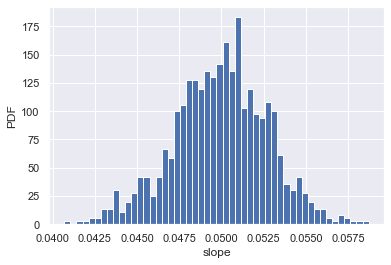

In [30]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

#### Plotting bootstrap regressions


In [31]:
len(bs_intercept_reps)

1000

In [32]:
len(bs_slope_reps)

1000

In [33]:
len(fertility)

162

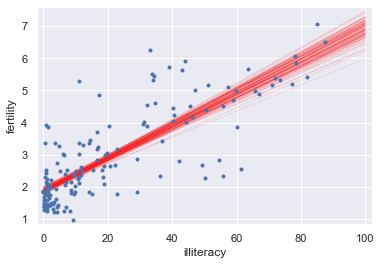

In [34]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# # Plot the bootstrap lines
for i in range(100):
    _ = plt.plot( x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = '.', linestyle = 'none')
# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

### Introduction to hypothesis testing


In [35]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [36]:
rain_june = [ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2]

In [37]:
rain_november = [ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8]

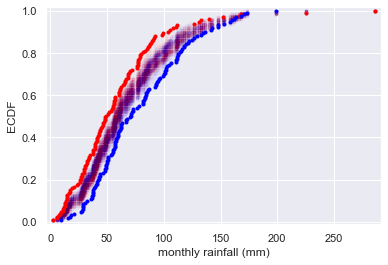

In [38]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [39]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)#, func(perm_sample_2)

    return perm_replicates

In [40]:
frog_df  = pd.read_csv("stats2/frog_tongue.csv",skiprows=14,usecols=['ID','impact force (mN)'])
frog_df['impact force (mN)'] = frog_df['impact force (mN)'].apply(lambda x:x/1000)

c:\users\husnain\dev2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


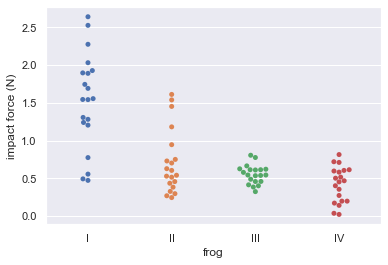

In [41]:
import seaborn as sns
# Make bee swarm plot
_ = sns.swarmplot('ID', 'impact force (mN)',data=frog_df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


In [42]:
# avg strike force of Frog-A

frog_df.groupby("ID")['impact force (mN)'].mean()

# the mean impact force for Frog-A is 1.53 N and for Frog-B, the mean value is 0.70 N

ID
I      1.53020
II     0.70735
III    0.55010
IV     0.41910
Name: impact force (mN), dtype: float64

In [43]:
force_a = frog_df[frog_df['ID'] == 'I']['impact force (mN)'].values

In [44]:
force_b = frog_df[frog_df['ID'] == 'II']['impact force (mN)'].values

In [45]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=1000000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 2.3e-05


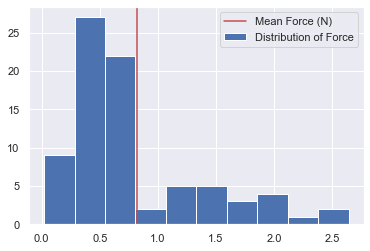

In [46]:
_ = plt.hist(frog_df['impact force (mN)'] ,bins=10,label='Distribution of Force')
plt.axvline(x=empirical_diff_means, color='r', linestyle='-' , label = 'Mean Force (N)')
plt.legend()

In [47]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b + 0.55 - np.mean(force_b)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.9527


In [48]:
bs_replicates

array([0.63145, 0.5812 , 0.6165 , ..., 0.5042 , 0.47015, 0.53285])

In [49]:
forces_concat = [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468]

In [50]:
empirical_diff_means = 0.28825000000000006

In [51]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.043


## Hypothesis test examples


In [52]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True]*136 + [False]*35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0004


In [53]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [54]:
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [55]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead,nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means,10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', np.round(p,10))

p-val = 0.0002


In [56]:
x_dead, y_dead  = ecdf(nht_dead)
x_live , y_live = ecdf(nht_live)

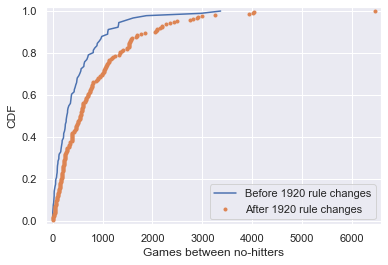

In [57]:
# Overlay the plots
plt.plot(x_dead, y_dead,label = 'Before 1920 rule changes')
plt.plot(x_live, y_live, marker='.', linestyle='none' , label = 'After 1920 rule changes')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.legend()
# Show the plot
plt.show()


In [58]:
# Compute observed correlation: r_obs
r_obs = pearsonr(illiteracy, fertility)[0]

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearsonr(illiteracy_permuted, fertility)[0]

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/ len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [59]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

In [60]:
treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

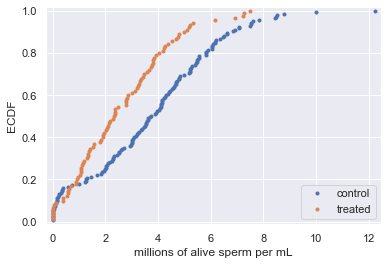

In [61]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


In [62]:
# Compute the difference in mean sperm count: diff_means
diff_means =  np.mean(control) - np.mean(treated) 

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate([control, treated]))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates =   bs_reps_control - bs_reps_treated
# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0002


## Case Study

In [63]:
beak_depth = [ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 ,
        9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  ,
        8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 ,
        9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 ,
        8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 ,
        8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 ,
        8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65,
        9.45,  9.45,  9.05,  8.75,  9.45,  8.35,  9.4 ,  8.9 ,  9.5 ,
       11.  ,  8.7 ,  8.4 ,  9.1 ,  8.7 , 10.2 ,  9.6 ,  8.85,  8.8 ,
        9.5 ,  9.2 ,  9.  ,  9.8 ,  9.3 ,  9.  , 10.2 ,  7.7 ,  9.  ,
        9.5 ,  9.4 ,  8.  ,  8.9 ,  9.4 ,  9.5 ,  8.  , 10.  ,  8.95,
        8.2 ,  8.8 ,  9.2 ,  9.4 ,  9.5 ,  8.1 ,  9.5 ,  8.4 ,  9.3 ,
        9.3 ,  9.6 ,  9.2 , 10.  ,  8.9 , 10.5 ,  8.9 ,  8.6 ,  8.8 ,
        9.15,  9.5 ,  9.1 , 10.2 ,  8.4 , 10.  , 10.2 ,  9.3 , 10.8 ,
        8.3 ,  7.8 ,  9.8 ,  7.9 ,  8.9 ,  7.7 ,  8.9 ,  9.4 ,  9.4 ,
        8.5 ,  8.5 ,  9.6 , 10.2 ,  8.8 ,  9.5 ,  9.3 ,  9.  ,  9.2 ,
        8.7 ,  9.  ,  9.1 ,  8.7 ,  9.4 ,  9.8 ,  8.6 , 10.6 ,  9.  ,
        9.5 ,  8.1 ,  9.3 ,  9.6 ,  8.5 ,  8.2 ,  8.  ,  9.5 ,  9.7 ,
        9.9 ,  9.1 ,  9.5 ,  9.8 ,  8.4 ,  8.3 ,  9.6 ,  9.4 , 10.  ,
        8.9 ,  9.1 ,  9.8 ,  9.3 ,  9.9 ,  8.9 ,  8.5 , 10.6 ,  9.3 ,
        8.9 ,  8.9 ,  9.7 ,  9.8 , 10.5 ,  8.4 , 10.  ,  9.  ,  8.7 ,
        8.8 ,  8.4 ,  9.3 ,  9.8 ,  8.9 ,  9.8 ,  9.1 ]

In [64]:
year = [1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012]

In [65]:
df = pd.DataFrame()

In [66]:
df['year'] = year

In [67]:
df['beak_depth'] = beak_depth

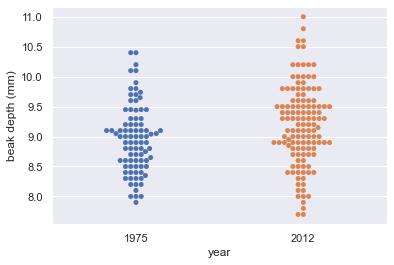

In [68]:
# Create bee swarm plot
_ = sns.swarmplot(x='year' , y = 'beak_depth', data = df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

In [69]:
bd_1975 = [ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 ,
        9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  ,
        8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 ,
        9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 ,
        8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 ,
        8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 ,
        8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65,
        9.45,  9.45,  9.05,  8.75,  9.45,  8.35]

In [70]:
bd_2012 = [ 9.4 ,  8.9 ,  9.5 , 11.  ,  8.7 ,  8.4 ,  9.1 ,  8.7 , 10.2 ,
        9.6 ,  8.85,  8.8 ,  9.5 ,  9.2 ,  9.  ,  9.8 ,  9.3 ,  9.  ,
       10.2 ,  7.7 ,  9.  ,  9.5 ,  9.4 ,  8.  ,  8.9 ,  9.4 ,  9.5 ,
        8.  , 10.  ,  8.95,  8.2 ,  8.8 ,  9.2 ,  9.4 ,  9.5 ,  8.1 ,
        9.5 ,  8.4 ,  9.3 ,  9.3 ,  9.6 ,  9.2 , 10.  ,  8.9 , 10.5 ,
        8.9 ,  8.6 ,  8.8 ,  9.15,  9.5 ,  9.1 , 10.2 ,  8.4 , 10.  ,
       10.2 ,  9.3 , 10.8 ,  8.3 ,  7.8 ,  9.8 ,  7.9 ,  8.9 ,  7.7 ,
        8.9 ,  9.4 ,  9.4 ,  8.5 ,  8.5 ,  9.6 , 10.2 ,  8.8 ,  9.5 ,
        9.3 ,  9.  ,  9.2 ,  8.7 ,  9.  ,  9.1 ,  8.7 ,  9.4 ,  9.8 ,
        8.6 , 10.6 ,  9.  ,  9.5 ,  8.1 ,  9.3 ,  9.6 ,  8.5 ,  8.2 ,
        8.  ,  9.5 ,  9.7 ,  9.9 ,  9.1 ,  9.5 ,  9.8 ,  8.4 ,  8.3 ,
        9.6 ,  9.4 , 10.  ,  8.9 ,  9.1 ,  9.8 ,  9.3 ,  9.9 ,  8.9 ,
        8.5 , 10.6 ,  9.3 ,  8.9 ,  8.9 ,  9.7 ,  9.8 , 10.5 ,  8.4 ,
       10.  ,  9.  ,  8.7 ,  8.8 ,  8.4 ,  9.3 ,  9.8 ,  8.9 ,  9.8 ,
        9.1 ]

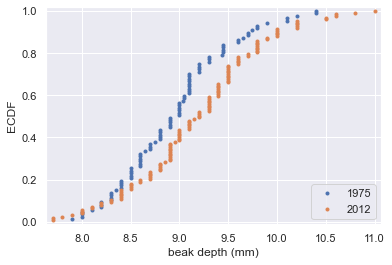

In [71]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [72]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean , 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = (bs_replicates_2012) - (bs_replicates_1975)

# Compute 95% confidence interval: conf_int
conf_int =  np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06240196 0.39049224] mm


In [73]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted , np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted , np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0033


In [74]:
bl_1975 = np.array([13.9 , 14.  , 12.9 , 13.5 , 12.9 , 14.6 , 13.  , 14.2 , 14.  ,
       14.2 , 13.1 , 15.1 , 13.5 , 14.4 , 14.9 , 12.9 , 13.  , 14.9 ,
       14.  , 13.8 , 13.  , 14.75, 13.7 , 13.8 , 14.  , 14.6 , 15.2 ,
       13.5 , 15.1 , 15.  , 12.8 , 14.9 , 15.3 , 13.4 , 14.2 , 15.1 ,
       15.1 , 14.  , 13.6 , 14.  , 14.  , 13.9 , 14.  , 14.9 , 15.6 ,
       13.8 , 14.4 , 12.8 , 14.2 , 13.4 , 14.  , 14.8 , 14.2 , 13.5 ,
       13.4 , 14.6 , 13.5 , 13.7 , 13.9 , 13.1 , 13.4 , 13.8 , 13.6 ,
       14.  , 13.5 , 12.8 , 14.  , 13.4 , 14.9 , 15.54, 14.63, 14.73,
       15.73, 14.83, 15.94, 15.14, 14.23, 14.15, 14.35, 14.95, 13.95,
       14.05, 14.55, 14.05, 14.45, 15.05, 13.25])

In [75]:
bl_2012 = np.array([14.3 , 12.5 , 13.7 , 13.8 , 12.  , 13.  , 13.  , 13.6 , 12.8 ,
       13.6 , 12.95, 13.1 , 13.4 , 13.9 , 12.3 , 14.  , 12.5 , 12.3 ,
       13.9 , 13.1 , 12.5 , 13.9 , 13.7 , 12.  , 14.4 , 13.5 , 13.8 ,
       13.  , 14.9 , 12.5 , 12.3 , 12.8 , 13.4 , 13.8 , 13.5 , 13.5 ,
       13.4 , 12.3 , 14.35, 13.2 , 13.8 , 14.6 , 14.3 , 13.8 , 13.6 ,
       12.9 , 13.  , 13.5 , 13.2 , 13.7 , 13.1 , 13.2 , 12.6 , 13.  ,
       13.9 , 13.2 , 15.  , 13.37, 11.4 , 13.8 , 13.  , 13.  , 13.1 ,
       12.8 , 13.3 , 13.5 , 12.4 , 13.1 , 14.  , 13.5 , 11.8 , 13.7 ,
       13.2 , 12.2 , 13.  , 13.1 , 14.7 , 13.7 , 13.5 , 13.3 , 14.1 ,
       12.5 , 13.7 , 14.6 , 14.1 , 12.9 , 13.9 , 13.4 , 13.  , 12.7 ,
       12.1 , 14.  , 14.9 , 13.9 , 12.9 , 14.6 , 14.  , 13.  , 12.7 ,
       14.  , 14.1 , 14.1 , 13.  , 13.5 , 13.4 , 13.9 , 13.1 , 12.9 ,
       14.  , 14.  , 14.1 , 14.7 , 13.4 , 13.8 , 13.4 , 13.8 , 12.4 ,
       14.1 , 12.9 , 13.9 , 14.3 , 13.2 , 14.2 , 13.  , 14.6 , 13.1 ,
       15.2 ])

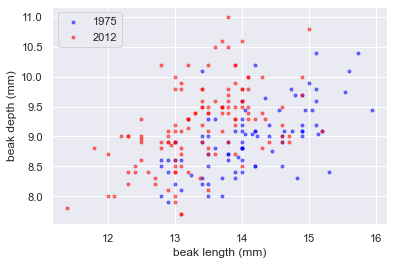

In [76]:
# Make scatter plot of 1975 data
_ = plt.scatter(bl_1975, bd_1975, marker='.',
             linestyle='None', color = 'blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.scatter(bl_2012, bd_2012, marker='.',
            linestyle='None', color = 'red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [77]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975 ,  np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012 , np.mean , 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975 , [0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55702892 1.60103187]
2012: mean ratio = 1.4658342276847767 conf int = [1.44395865 1.48759661]


In [78]:
bd_parent_scandens = np.array([ 8.3318,  8.4035,  8.5317,  8.7202,  8.7089,  8.7541,  8.773 ,
        8.8107,  8.7919,  8.8069,  8.6523,  8.6146,  8.6938,  8.7127,
        8.7466,  8.7504,  8.7805,  8.7428,  8.7164,  8.8032,  8.8258,
        8.856 ,  8.9012,  8.9125,  8.8635,  8.8258,  8.8522,  8.8974,
        8.9427,  8.9879,  8.9615,  8.9238,  8.9351,  9.0143,  9.0558,
        9.0596,  8.9917,  8.905 ,  8.9314,  8.9465,  8.9879,  8.9804,
        9.0219,  9.052 ,  9.0407,  9.0407,  8.9955,  8.9992,  8.9992,
        9.0747,  9.0747,  9.5385,  9.4781,  9.4517,  9.3537,  9.2707,
        9.1199,  9.1689,  9.1425,  9.135 ,  9.1011,  9.1727,  9.2217,
        9.2255,  9.2821,  9.3235,  9.3198,  9.3198,  9.3198,  9.3273,
        9.3725,  9.3989,  9.4253,  9.4593,  9.4442,  9.4291,  9.2632,
        9.2293,  9.1878,  9.1425,  9.1275,  9.1802,  9.1765,  9.2481,
        9.2481,  9.1991,  9.1689,  9.1765,  9.2406,  9.3198,  9.3235,
        9.1991,  9.2971,  9.2443,  9.316 ,  9.2934,  9.3914,  9.3989,
        9.5121,  9.6176,  9.5535,  9.4668,  9.3725,  9.3348,  9.3763,
        9.3839,  9.4216,  9.4065,  9.3348,  9.4442,  9.4367,  9.5083,
        9.448 ,  9.4781,  9.595 ,  9.6101,  9.5686,  9.6365,  9.7119,
        9.8213,  9.825 ,  9.7609,  9.6516,  9.5988,  9.546 ,  9.6516,
        9.7572,  9.8854, 10.0023,  9.3914])

In [79]:
bd_offspring_scandens = np.array([ 8.419 ,  9.2468,  8.1532,  8.0089,  8.2215,  8.3734,  8.5025,
        8.6392,  8.7684,  8.8139,  8.7911,  8.9051,  8.9203,  8.8747,
        8.943 ,  9.0038,  8.981 ,  9.0949,  9.2696,  9.1633,  9.1785,
        9.1937,  9.2772,  9.0722,  8.9658,  8.9658,  8.5025,  8.4949,
        8.4949,  8.5633,  8.6013,  8.6468,  8.1532,  8.3734,  8.662 ,
        8.6924,  8.7456,  8.8367,  8.8595,  8.9658,  8.9582,  8.8671,
        8.8671,  8.943 ,  9.0646,  9.1405,  9.2089,  9.2848,  9.3759,
        9.4899,  9.4519,  8.1228,  8.2595,  8.3127,  8.4949,  8.6013,
        8.4646,  8.5329,  8.7532,  8.8823,  9.0342,  8.6392,  8.6772,
        8.6316,  8.7532,  8.8291,  8.8975,  8.9734,  9.0494,  9.1253,
        9.1253,  9.1253,  9.1785,  9.2848,  9.4595,  9.3608,  9.2089,
        9.2544,  9.3684,  9.3684,  9.2316,  9.1709,  9.2316,  9.0342,
        8.8899,  8.8291,  8.981 ,  8.8975, 10.4089, 10.1886,  9.7633,
        9.7329,  9.6114,  9.5051,  9.5127,  9.3684,  9.6266,  9.5354,
       10.0215, 10.0215,  9.6266,  9.6038,  9.4063,  9.2316,  9.338 ,
        9.262 ,  9.262 ,  9.4063,  9.4367,  9.0342,  8.943 ,  8.9203,
        8.7835,  8.7835,  9.057 ,  8.9354,  8.8975,  8.8139,  8.8671,
        9.0873,  9.2848,  9.2392,  9.2924,  9.4063,  9.3152,  9.4899,
        9.5962,  9.6873,  9.5203,  9.6646])

In [80]:
bd_parent_fortis = np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  ,
        9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  ,
       10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  ,
        8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 ,
        9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  ,
       10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  ,
        9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 ,
        9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 ,
       10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 ,
       10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625,
        9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 ,
        9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 ,
        9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 ,
        9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   ,
        9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  ,
        9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  ,
        9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 ,
        9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 ,
       10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775,
        9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025,
        8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
       10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  ,
        9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  ,
        8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 ,
        8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  ,
        9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 ,
       10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775,
        9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 ,
        9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 ,
       10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  ,
        8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 ,
        8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   ,
        9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 ,
        9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 ,
        8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 ,
        9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825,
        9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375,
        8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 ,
        9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 ,
        9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  ,
        9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 ,
        9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725,
        8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])

In [82]:
bd_offspring_fortis = np.array([10.7 ,  9.78,  9.48,  9.6 , 10.27,  9.5 ,  9.  ,  7.46,  7.65,
        8.63,  9.81,  9.4 ,  9.48,  8.75,  7.6 , 10.  , 10.09,  9.74,
        9.64,  8.49, 10.15, 10.28,  9.2 , 10.01,  9.03,  9.94, 10.5 ,
        9.7 , 10.02, 10.04,  9.43,  8.1 ,  9.5 ,  9.9 ,  9.48, 10.18,
       10.16,  9.08, 10.39,  9.9 ,  8.4 , 10.6 ,  8.75,  9.46,  9.6 ,
        9.6 ,  9.95, 10.05, 10.16, 10.1 ,  9.83,  9.46,  9.7 ,  9.82,
       10.34,  8.02,  9.65,  9.87,  9.  , 11.14,  9.25,  8.14, 10.23,
        8.7 ,  9.8 , 10.54, 11.19,  9.85,  8.1 ,  9.3 ,  9.34,  9.19,
        9.52,  9.36,  8.8 ,  8.6 ,  8.  ,  8.5 ,  8.3 , 10.38,  8.54,
        8.94, 10.  ,  9.76,  9.45,  9.89, 10.9 ,  9.91,  9.39,  9.86,
        9.74,  9.9 ,  9.09,  9.69, 10.24,  8.9 ,  9.67,  8.93,  9.3 ,
        8.67,  9.15,  9.23,  9.59,  9.03,  9.58,  8.97,  8.57,  8.47,
        8.71,  9.21,  9.13,  8.5 ,  9.58,  9.21,  9.6 ,  9.32,  8.7 ,
       10.46,  9.29,  9.24,  9.45,  9.35, 10.19,  9.91,  9.18,  9.89,
        9.6 , 10.3 ,  9.45,  8.79,  9.2 ,  8.8 ,  9.69, 10.61,  9.6 ,
        9.9 ,  9.26, 10.2 ,  8.79,  9.28,  8.83,  9.76, 10.2 ,  9.43,
        9.4 ,  9.9 ,  9.5 ,  8.95,  9.98,  9.72,  9.86, 11.1 ,  9.14,
       10.49,  9.75, 10.35,  9.73,  9.83,  8.69,  9.58,  8.42,  9.25,
       10.12,  9.31,  9.99,  8.59,  8.74,  8.79,  9.6 ,  9.52,  8.93,
       10.23,  9.35,  9.35,  9.09,  9.04,  9.75, 10.5 ,  9.09,  9.05,
        9.54,  9.3 ,  9.06,  8.7 ,  9.32,  8.4 ,  8.67,  8.6 ,  9.53,
        9.77,  9.65,  9.43,  8.35,  8.26,  9.5 ,  8.6 ,  9.57,  9.14,
       10.79,  8.91,  9.93, 10.7 ,  9.3 ,  9.93,  9.51,  9.44, 10.05,
       10.13,  9.24,  8.21,  8.9 ,  9.34,  8.77,  9.4 ,  8.82,  8.83,
        8.6 ,  9.5 , 10.2 ,  8.09,  9.07,  9.29,  9.1 , 10.19,  9.25,
        8.98,  9.02,  8.6 ,  8.25,  8.7 ,  9.9 ,  9.65,  9.45,  9.38,
       10.4 ,  9.96,  9.46,  8.26, 10.05,  8.92,  9.5 ,  9.43,  8.97,
        8.44,  8.92, 10.3 ,  8.4 ,  9.37,  9.91, 10.  ,  9.21,  9.95,
        8.84,  9.82,  9.5 , 10.29,  8.4 ,  8.31,  9.29,  8.86,  9.4 ,
        9.62,  8.62,  8.3 ,  9.8 ,  8.48,  9.61,  9.5 ,  9.37,  8.74,
        9.31,  9.5 ,  9.49,  9.74,  9.2 ,  9.24,  9.7 ,  9.64,  9.2 ,
        7.5 ,  7.5 ,  8.7 ,  8.31,  9.  ,  9.74,  9.31, 10.5 ,  9.3 ,
        8.12,  9.34,  9.72,  9.  ,  9.65,  9.9 , 10.  , 10.1 ,  8.  ,
        9.07,  9.75,  9.33,  8.11,  9.36,  9.74,  9.9 ,  9.23,  9.7 ,
        8.2 ,  9.35,  9.49,  9.34,  8.87,  9.03,  9.07,  9.43,  8.2 ,
        9.19,  9.  ,  9.2 ,  9.06,  9.81,  8.89,  9.4 , 10.45,  9.64,
        9.03,  8.71,  9.91,  8.33,  8.2 ,  7.83,  7.14,  8.91,  9.18,
        8.8 ,  9.9 ,  7.73,  9.25,  8.7 ,  9.5 ,  9.3 ,  9.05, 10.18,
        8.85,  9.24,  9.15,  9.98,  8.77,  9.8 ,  8.65, 10.  ,  8.81,
        8.01,  7.9 ,  9.41, 10.18,  9.55,  9.08,  8.4 ,  9.75,  8.9 ,
        9.07,  9.35,  8.9 ,  8.19,  8.65,  9.19,  8.9 ,  9.28, 10.58,
        9.  ,  9.4 ,  8.91,  9.93, 10.  ,  9.37,  7.4 ,  9.  ,  8.8 ,
        9.18,  8.3 , 10.08,  7.9 ,  9.96, 10.4 ,  9.65,  8.8 ,  8.65,
        9.7 ,  9.23,  9.43,  9.93,  8.47,  9.55,  9.28,  8.85,  8.9 ,
        8.75,  8.63,  9.  ,  9.43,  8.28,  9.23, 10.4 ,  9.  ,  9.8 ,
        9.77,  8.97,  8.37,  7.7 ,  7.9 ,  9.5 ,  8.2 ,  8.8 ])

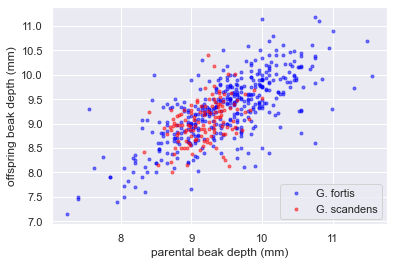

In [83]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker=".", linestyle='none', color="blue", alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker=".", linestyle="none", color="red", alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


In [107]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = np.array(x[bs_inds]) , np.array(y[bs_inds])
        bs_replicates[i] = pearsonr(list(bs_x), list(bs_y))

    return bs_replicates